<a href="https://colab.research.google.com/github/JamshedAli18/deep-learning-basics/blob/main/Simple_Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Generate dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)



In [3]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:
# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [5]:
# Define ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),  # Hidden layer (10 neurons)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (1 neuron)
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [7]:
# Train model
model.fit(X_train, y_train, epochs=100, verbose=0)



In [9]:
#Evaluate model accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8700


In [10]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


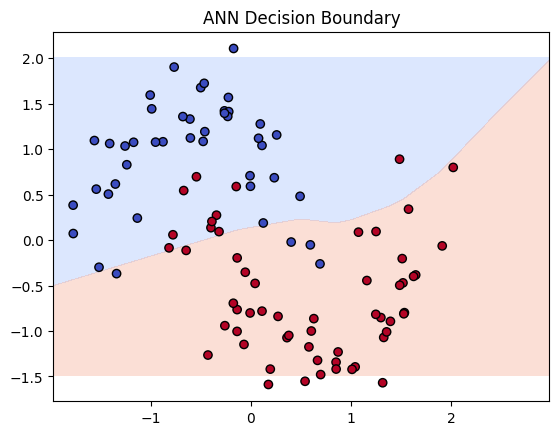

In [12]:
# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100),
                     np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)
Z = model.predict(grid_scaled)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
plt.title("ANN Decision Boundary")
plt.show()